BY- JAHNVI BHATIA

In [20]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
data = pd.read_csv(url)

# Handle missing values
data.dropna(inplace=True)

# Convert categorical variables to numerical values
data = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split the data into features and target
X = data.drop(['RainTomorrow', 'Rainfall'], axis=1)
y_rain_tomorrow = data['RainTomorrow']
y_rainfall = data['Rainfall']

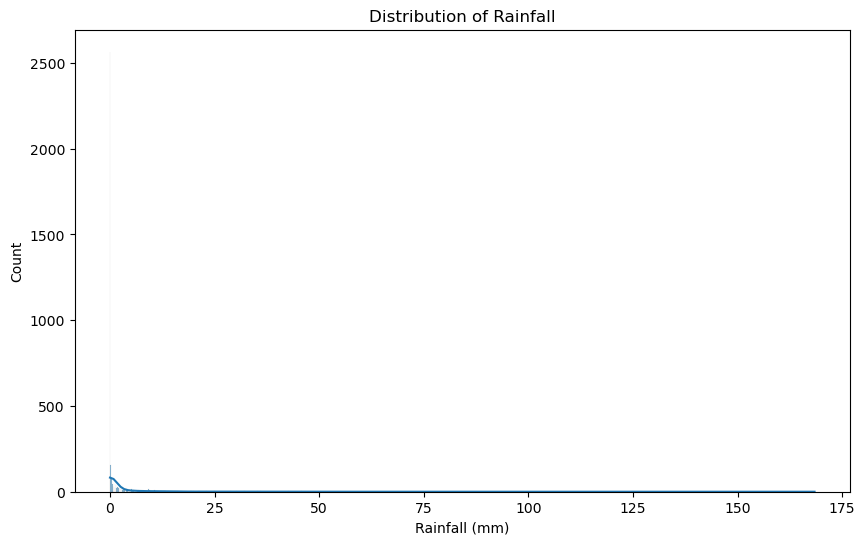

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of Rainfall
plt.figure(figsize=(10, 6))
sns.histplot(data['Rainfall'], kde=True)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Count')
plt.title('Distribution of Rainfall')
plt.show()

In [22]:
# Feature engineering
# Convert 'RainToday' to numerical values (0 or 1)
X_selected['RainToday'] = X_selected['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature selection (you can modify this based on your analysis)
selected_features = ['MinTemp', 'MaxTemp', 'Sunshine', 'Humidity9am', 'Pressure9am', 'RainToday']
X_selected = X_selected[selected_features]

# Feature scaling (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train_rain, y_test_rain, y_train_rainfall, y_test_rainfall = train_test_split(
    X_scaled, y_rain_tomorrow, y_rainfall, test_size=0.2, random_state=42
)

# Train the binary classification model (Rain Tomorrow)
clf = RandomForestClassifier()
clf.fit(X_train, y_train_rain)
y_pred_rain = clf.predict(X_test)
accuracy_rain = accuracy_score(y_test_rain, y_pred_rain)

# Train the regression model (Rainfall Prediction)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train_rainfall)
y_pred_rainfall = regressor.predict(X_test)
mse_rainfall = mean_squared_error(y_test_rainfall, y_pred_rainfall)

print("Accuracy for Rain Tomorrow:", accuracy_rain)
print("Mean Squared Error for Rainfall Prediction:", mse_rainfall)


Accuracy for Rain Tomorrow: 0.8759894459102903
Mean Squared Error for Rainfall Prediction: 38.85384239050131
